<font size='4'><b>Problem statement:</b> Conduct sentiment Analysis on Twitter's Sentiment140 dataset.</font>

<br/><br/>

In [1]:
# Importing libraries.
import pandas as pd
import numpy as np

import re
from bs4 import BeautifulSoup
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Assets/Twitter.csv', encoding = 'latin1', header = None)

In [5]:
df.head(3)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [6]:
df = df[[5, 0]]

In [7]:
df.head(3)

,5,0
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0


In [12]:
df.columns = ['twitts', 'sentiment']
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [9]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [16]:
df['twitts'].isna().sum()

0

In [15]:
df[df['twitts']=="' '" ].count()

twitts       0
sentiment    0
dtype: int64

In [17]:
sent_map = {0: 'negative', 4: 'positive'}

#### Word count

In [18]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [11]:
df.head(3)

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18


#### Charecter count

In [19]:
df['char_counts'] = df['twitts'].apply(lambda x: len(x))

In [13]:
df.head(3)

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89


#### Average word length

In [20]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) 

In [21]:
df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x))

In [16]:
df.head(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444


#### Stop words count

In [22]:
print(STOP_WORDS)

{'him', 'elsewhere', 'together', 'once', 'afterwards', 'then', 'keep', 'quite', 'except', 'namely', 'anything', 'will', 'take', 'above', 'toward', 'unless', 'below', 'whereafter', 'see', 'we', 'her', 'top', 'whom', 'others', 'hence', 'there', 'only', 'never', 'have', 'almost', 'also', 'anyway', 'front', 'own', 'six', 'whereby', '’ll', 'here', 'your', 'but', 'wherever', 'otherwise', 'yourselves', 'when', 'until', 'amount', 'that', "'d", 'two', 'up', "'s", 'wherein', 'becomes', 'although', 'what', 'whether', 'be', 'would', 'part', 'more', 'ever', 'nine', 'through', 'last', 'thereafter', "'ll", 'itself', 'as', 'you', 'from', 'thence', 'those', 'these', 'whither', 'whole', 'while', '‘ll', 'of', 'bottom', 'fifteen', 'twenty', 'same', 'much', 'further', 'ourselves', '‘m', 'nobody', 'seeming', 'his', 'please', 'enough', 'by', 'less', 'anyhow', 'our', 'such', 'across', 'three', 'a', 'among', 'n’t', 'was', 'most', 'cannot', 'it', 'seem', 'used', 'or', 'name', 'because', 'first', 'upon', 'nowher

In [23]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [19]:
df.head(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7


#### Counting # tags and @ mentions.

In [24]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [23]:
df.head(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1


#### Checking for digits in twitts.

In [25]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [25]:
df.head(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0


#### Upper case words value count

In [26]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [27]:
df.head(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1


### Preprocessing and Cleaning

#### Converting into lower case. 

In [27]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())

In [28]:
df.head(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1


#### Expansion of shorthands/contractions 

In [29]:
shorthands = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [30]:
def short_to_exp(x):
    if type(x) is str:
        for key in shorthands:
            value = shorthands[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [31]:
x=' u n i, in this beautiful world'

In [32]:
print(short_to_exp(x))

 you and i, in this beautiful world


In [33]:
df['twitts'] = df['twitts'].apply(lambda x: short_to_exp(x))

In [34]:
df.head(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1


#### Counting and removing emails.

In [35]:
x = 'hi,email me at email@email.com another@email.com'    

In [36]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)

['email@email.com', 'another@email.com']

In [37]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))

In [38]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [39]:
df[df['emails_count']>0].head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.15,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.00,1,0,0,0,0,[elledell@gmail.com],1


In [40]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)

'hi,email me at  '

In [41]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))

In [42]:
df[df['emails_count']>0].head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.15,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.00,1,0,0,0,0,[elledell@gmail.com],1


#### Counting URLs and removing them.

In [43]:
x = 'hi, to know more visit https://https://en.wikipedia.org/wiki/Coronavirus'

In [44]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'en.wikipedia.org', '/wiki/Coronavirus')]

In [45]:
df['urls_flag'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [46]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))

In [47]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0


#### Removing RT (retweet characters).

In [48]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "", x))

In [49]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0


#### Removing special characters and punctuations.

In [50]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [51]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0


#### Removing multiple spaces.

In [52]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))

In [53]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0


#### Removing HTML tags.

In [54]:
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

In [55]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0


#### Removing Stop words.

In [56]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [81]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0


### Common words removal

#### Note: We should make the Dataframe immutable if we are doing word cloud

In [82]:
' '.join(df.head()['twitts'])

'switchfoot awww bummer shoulda david carr d upset update facebook texting cry result school blah kenichan dived times ball managed save 50 rest bounds body feels itchy fire nationwideclass behaving mad'

In [83]:
text = ' '.join(df['twitts'])

In [84]:
text = text.split()

In [85]:
freq_comm = pd.Series(text).value_counts()

In [86]:
freq_comm 

think              41040
night              41029
amp                40616
thanks             39311
home               39168
                   ...  
excellencesorry        1
likeforever            1
sayaaa                 1
justjaz                1
xts                    1
Length: 787271, dtype: int64

In [87]:
f15 = freq_comm[:15]
f15

think       41040
night       41029
amp         40616
thanks      39311
home        39168
oh          37970
2           37945
miss        36099
need        35531
morning     33117
hope        33053
great       32805
tomorrow    32664
twitter     31224
haha        30264
dtype: int64

In [88]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f15]))

In [89]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0


### Rare words removal

In [90]:
rare40 = freq_comm[-40:]

In [91]:
rare = freq_comm[freq_comm.values == 1]
rare.head(3)

malevolentme        1
bradiewebbstacks    1
halfgotta           1
dtype: int64

In [92]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare40]))

In [93]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0


### Word Cloud

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
x = ' '.join(text[:20000])

In [96]:
len(text)

9905854

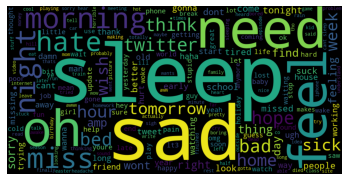

In [97]:
wc = WordCloud(width = 1000, height=500).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spelling correction

In [98]:
from textblob import TextBlob

In [99]:
x=df.iloc[2,0]
x

'kenichan dived times ball managed save 50 rest bounds'

In [100]:
print(TextBlob(x).correct())

kenichan dived times ball managed save 50 rest bounds


In [101]:
df.shape

(1600000, 13)

### Tokenisation

In [102]:
x=df.iloc[2,0]

In [103]:
TextBlob(x).words

WordList(['kenichan', 'dived', 'times', 'ball', 'managed', 'save', '50', 'rest', 'bounds'])

In [105]:
sp=spacy.load('en_core_web_sm')
doc = sp(x)
for token in doc:
    print(token)

kenichan
dived
times
ball
managed
save
50
rest
bounds


### Stemming

In [106]:
tokens=word_tokenize(x)

In [107]:
stemmer = SnowballStemmer(language='english')
for token in tokens:
    print(token + ' --> ' + stemmer.stem(token))

kenichan --> kenichan
dived --> dive
times --> time
ball --> ball
managed --> manag
save --> save
50 --> 50
rest --> rest
bounds --> bound


### Lemmatization

In [108]:
for word in doc:
    print(word.text,  word.lemma_)

kenichan kenichan
dived dive
times times
ball ball
managed manage
save save
50 50
rest rest
bounds bound


#### Detecting Nouns.

In [109]:
for noun in doc.noun_chunks:
    print(noun)

kenichan
50 rest bounds


#### Detecting Entities using NER of SpaCy.

In [110]:
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

kenichan - GPE - Countries, cities, states
50 - CARDINAL - Numerals that do not fall under another type


### Model Buiding

In [111]:
df.shape

(1600000, 13)

In [112]:
df['twitts'].isna().sum()

0

#### Sampling the observations.

In [114]:
df_neg = df[df['sentiment']==0].sample(3000)
df_pos = df[df['sentiment']==4].sample(3000)

In [115]:
dfs = df_neg.append(df_pos)

In [116]:
dfs.head(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
251714,dannymcfly england england helloooo scotland,0,7,64,8.142857,2,0,1,0,2,[],0,0
205835,alot pain iwas hurtn bad didnt lastnit,0,16,79,3.937500,9,0,0,0,0,[],0,0
244256,doctors japped needles,0,11,51,3.636364,8,0,0,0,0,[],0,0


In [117]:
dfs_manual=dfs.drop(columns=['twitts','sentiment','emails'], axis = 1).reset_index(drop=True)

In [118]:
dfs_manual.head(3)

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag
0,7,64,8.142857,2,0,1,0,2,0,0
1,16,79,3.937500,9,0,0,0,0,0,0
2,11,51,3.636364,8,0,0,0,0,0,0


In [119]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [120]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc}

In [121]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

### Bag of Words

In [122]:
y=dfs["sentiment"]

In [123]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfs['twitts'])

In [124]:
text_counts.toarray().shape

(6000, 13007)

In [125]:
dfs_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())
dfs_bow.head(3)

,000,06,07,08,09,0ktimeforplanb,10,100,1000,100dollars,...,zumba,zune,zunizurianty,zurich,zwart,zweibz7,zxch,zzzz,zzzzzz,zzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X = dfs_manual.join(dfs_bow)

In [127]:
X.head(3)

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count,urls_flag,...,zumba,zune,zunizurianty,zurich,zwart,zweibz7,zxch,zzzz,zzzzzz,zzzzzzzzzz
0,7,64,8.142857,2,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,79,3.937500,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,51,3.636364,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

In [129]:
classify(X, y)

SGD  --->  0.6825
LGR  --->  0.6975
LGR-CV  --->  0.69
SVM  --->  0.6825
RFC  --->  0.6791666666666667


### TF-IDF

#### Passing both original and manual features.

In [130]:
tfidf = TfidfVectorizer()
X= tfidf.fit_transform(dfs['twitts'])

In [131]:
classify(pd.DataFrame(X.toarray()), y)

SGD  --->  0.6625
LGR  --->  0.69
LGR-CV  --->  0.6875
SVM  --->  0.67
RFC  --->  0.635


### Word2Vec

In [132]:
splg = spacy.load('en_core_web_lg')

In [137]:
def get_vec(x):
    doc = splg(x)
    return doc.vector.reshape(1, -1)

In [138]:
dfs['vec'] = dfs['twitts'].apply(lambda x: get_vec(x))

In [139]:
dfs['vec'].shape

(6000,)

In [140]:
X = np.concatenate(dfs['vec'].to_numpy(), axis = 0)
X.shape

(6000, 300)

In [141]:
classify(pd.DataFrame(X), y)

SGD  --->  0.6583333333333333
LGR  --->  0.6858333333333333
LGR-CV  --->  0.68
SVM  --->  0.62
RFC  --->  0.6633333333333333


#### We will select the Logistic Regression with Bag of words which gave the highest accuracy (70%). Hyperparameter optimisation will lead to a better model.

<br/><br/>

<font size='4'><b>Final thoughts:</b> Here, we have performed data cleaning followed by featurization. Finally, built machine learning models on top of extracted features.</font>